In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

Using TensorFlow backend.


17473536/17464789 [==============================] - 0s 0us/step


In [2]:
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [3]:
train_labels[0]

1

In [4]:
import numpy as np

def vectorize_sequence(sequence, dimension=10000):
    results = np.zeros((len(sequence), dimension))
    for i, sequence in enumerate(sequence):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 257us/step - loss: 0.5201 - accuracy: 0.7857 - val_loss: 0.4009 - val_accuracy: 0.8593
Epoch 2/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.3089 - accuracy: 0.9043 - val_loss: 0.3046 - val_accuracy: 0.8892
Epoch 3/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.2235 - accuracy: 0.9273 - val_loss: 0.2794 - val_accuracy: 0.8900
Epoch 4/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.1803 - accuracy: 0.9380 - val_loss: 0.2851 - val_accuracy: 0.8857
Epoch 5/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.1442 - accuracy: 0.9544 - val_loss: 0.2789 - val_accuracy: 0.8884
Epoch 6/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.1242 - accuracy: 0.9596 - val_loss: 0.3081 - val_accuracy: 0.8828
Epoch 7/20
15000/15000 [==============================] - 3s 1

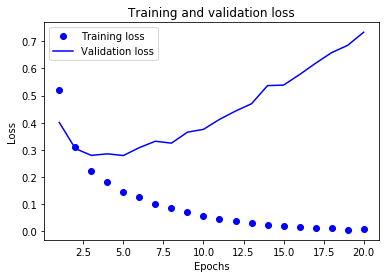

In [12]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [13]:
history_dict.keys()

['loss', 'val_accuracy', 'val_loss', 'accuracy']

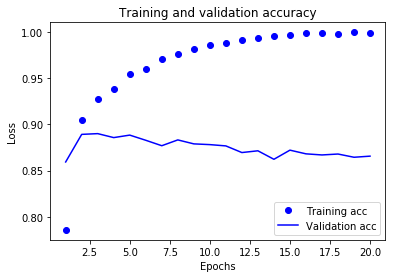

In [14]:
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [15]:
from keras.datasets import reuters

(reuters_train_data, reuters_train_labels), (reuters_test_data, reuters_test_labels) = reuters.load_data(num_words=10000)



2121728/2110848 [==============================] - 0s 0us/step


In [16]:
print(len(reuters_train_data))
print(len(reuters_test_data))

8982
2246


In [17]:
reuters_train_data[0][:10]

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207]

In [18]:
reuters_x_train = vectorize_sequence(reuters_train_data)
reuters_x_test = vectorize_sequence(reuters_test_data)

In [19]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_reuters_labels = to_one_hot(reuters_train_labels)
on_hot_test_reuters_labels = to_one_hot(reuters_test_labels)

In [20]:
reuters_model = models.Sequential()
reuters_model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
reuters_model.add(layers.Dense(64, activation='relu'))
reuters_model.add(layers.Dense(46, activation='softmax'))

In [21]:
reuters_model.compile(optimizer='rmsprop',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

In [22]:
reuters_x_val = reuters_x_train[:1000]
reuters_partial_x_train = reuters_x_train[1000:]

reuters_y_val = one_hot_train_reuters_labels[:1000]
reuters_partial_y_train = one_hot_train_reuters_labels[1000:]

In [23]:
reuters_model_history = reuters_model.fit(reuters_partial_x_train,
                                          reuters_partial_y_train,
                                          epochs=20,
                                          batch_size=512,
                                          validation_data=(reuters_x_val, reuters_y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 167us/step - loss: 2.7023 - accuracy: 0.4654 - val_loss: 1.7887 - val_accuracy: 0.6440
Epoch 2/20
7982/7982 [==============================] - 1s 134us/step - loss: 1.4470 - accuracy: 0.7067 - val_loss: 1.3067 - val_accuracy: 0.7090
Epoch 3/20
7982/7982 [==============================] - 1s 132us/step - loss: 1.0388 - accuracy: 0.7824 - val_loss: 1.1220 - val_accuracy: 0.7690
Epoch 4/20
7982/7982 [==============================] - 1s 131us/step - loss: 0.8052 - accuracy: 0.8309 - val_loss: 1.0143 - val_accuracy: 0.7900
Epoch 5/20
7982/7982 [==============================] - 1s 131us/step - loss: 0.6367 - accuracy: 0.8696 - val_loss: 0.9417 - val_accuracy: 0.8070
Epoch 6/20
7982/7982 [==============================] - 1s 131us/step - loss: 0.5082 - accuracy: 0.8973 - val_loss: 0.9168 - val_accuracy: 0.8110
Epoch 7/20
7982/7982 [==============================] - 1s 132us/step - loss

In [26]:
reuters_model_history.history.keys()

['loss', 'val_accuracy', 'val_loss', 'accuracy']

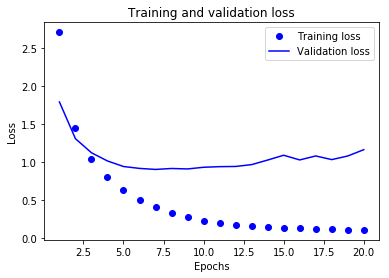

In [27]:
reuters_loss = reuters_model_history.history['loss']
reuters_val_loss = reuters_model_history.history['val_loss']

reuters_epochs = range(1, len(reuters_loss) + 1)

plt.plot(reuters_epochs, reuters_loss, 'bo', label = 'Training loss')
plt.plot(reuters_epochs, reuters_val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

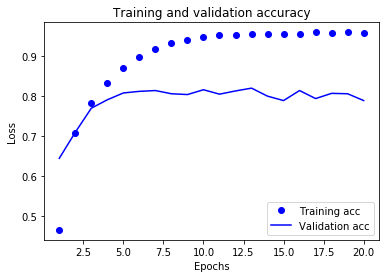

In [28]:
reuters_acc = reuters_model_history.history['accuracy']
reuters_val_acc = reuters_model_history.history['val_accuracy']

plt.plot(reuters_epochs, reuters_acc, 'bo', label = 'Training acc')
plt.plot(reuters_epochs, reuters_val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()